####  1. DATA 불러오기

In [1]:
import pandas as pd
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [2]:
!pip install koreanize-matplotlib

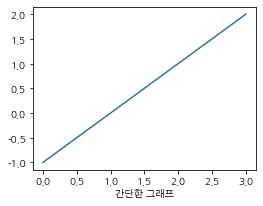

In [3]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
plt.figure(figsize=(4,3))
plt.plot([-1, 0, 1, 2])
plt.xlabel('간단한 그래프')
plt.show()

In [4]:
df2016 = pd.read_excel('./data/data_day_2016.xlsx',engine = 'openpyxl')
df2017 = pd.read_excel('./data/data_day_2017.xlsx',engine = 'openpyxl')
df2018 = pd.read_excel('./data/data_day_2018.xlsx',engine = 'openpyxl')
df2019 = pd.read_excel('./data/data_day_2019.xlsx',engine = 'openpyxl')

In [5]:
df2016.head(2)

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),이산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,20160101,강남구,0.047,0.006,0.8,0.006,73.0,44.0
1,20160101,강남대로,0.054,0.004,1.2,0.009,85.0,52.0


In [6]:
df2017.head(2)

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),이산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,20170101,강남구,0.040,0.002,0.8,0.005,80.0,58.0
1,20170101,강남대로,0.082,0.005,1.4,0.007,83.0,58.0


In [7]:
df2018.head(2)

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),이산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,20180101,강남구,0.033,0.010,0.6,0.006,34.0,22.0
1,20180101,강남대로,0.040,0.007,0.8,0.006,NaN,17.0


In [8]:
df2019.head(2)

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,20200818,강남구,0.022,0.006,0.4,0.003,28.0,21.0
1,20200818,강남대로,0.017,0.005,0.6,0.003,25.0,11.0


#### 2. 데이터 병합하기

In [9]:
dfList = [df2016,df2017,df2018,df2019]
df = pd.concat(dfList,axis=0)
df.shape

(60208, 9)

In [10]:
temp1 = pd.DataFrame({'A': [1, 2],
                     'B': [3, 4]})
temp2 = pd.DataFrame({'A': [5, 6],
                     'B': [7, 8]})
pd.concat([temp1, temp2],axis=1) #axis으로 컬럼방향 조정

,A,B,A,B
0,1,3,5,7
1,2,4,6,8


In [11]:
#glob 함수로 데이터 불러오기
import glob
glob.glob('./data/data_day_*.xlsx')#불러올 데이터 규칙

['./data\\data_day_2016.xlsx',
 './data\\data_day_2017.xlsx',
 './data\\data_day_2018.xlsx',
 './data\\data_day_2019.xlsx']

In [12]:
# 데이터는 61996개인데 왜 인덱스 번호가 0 ~ 19256일까?
# Int64Index: 61996 entries, 0 to 19256
# 결측치가 왜 많을까
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60208 entries, 0 to 19256
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   측정일시          60208 non-null  int64  
 1   측정소명          60208 non-null  object 
 2   이산화질소농도(ppm)  58050 non-null  float64
 3   오존농도(ppm)     58075 non-null  float64
 4   이산화탄소농도(ppm)  40421 non-null  float64
 5   아황산가스(ppm)    58075 non-null  float64
 6   미세먼지(㎍/㎥)     59327 non-null  float64
 7   초미세먼지(㎍/㎥)    58429 non-null  float64
 8   일산화탄소농도(ppm)  17591 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.6+ MB


In [13]:
df.tail(3)

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),이산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),일산화탄소농도(ppm)
19254,20190818,행주,0.014,0.060,NaN,0.004,25.0,13.0,0.5
19255,20190818,홍릉로,0.027,0.047,NaN,0.004,30.0,20.0,0.7
19256,20190818,화랑로,0.022,0.040,NaN,0.003,13.0,13.0,0.3


In [14]:
# 데이터병합 할 때 index 번호는 그대로, 1번부터 순차적으로 번호가 부여되는 것이 아님
print(df2016.shape,df2017.shape,df2018.shape,df2019.shape)
df.iloc[14268:14271,:]

(14269, 8) (14235, 8) (12447, 8) (19257, 8)


,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),이산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),일산화탄소농도(ppm)
14268,20161231,화랑로,0.122,0.004,1.1,0.005,64.0,NaN,NaN
0,20170101,강남구,0.040,0.002,0.8,0.005,80.0,58.0,NaN
1,20170101,강남대로,0.082,0.005,1.4,0.007,83.0,58.0,NaN


In [15]:
df2 = pd.concat(dfList,ignore_index=True) # index 번호 순차적으로 부여
df2.tail(3)

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),이산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),일산화탄소농도(ppm)
60205,20190818,행주,0.014,0.060,NaN,0.004,25.0,13.0,0.5
60206,20190818,홍릉로,0.027,0.047,NaN,0.004,30.0,20.0,0.7
60207,20190818,화랑로,0.022,0.040,NaN,0.003,13.0,13.0,0.3


In [16]:
df.index = pd.RangeIndex(len(df)) #데이터 크기만큼 index 번호 부여
df.tail(3)

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),이산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),일산화탄소농도(ppm)
60205,20190818,행주,0.014,0.060,NaN,0.004,25.0,13.0,0.5
60206,20190818,홍릉로,0.027,0.047,NaN,0.004,30.0,20.0,0.7
60207,20190818,화랑로,0.022,0.040,NaN,0.003,13.0,13.0,0.3


#### 3. 데이터 전처리

In [17]:
df.dtypes

측정일시              int64
측정소명             object
이산화질소농도(ppm)    float64
오존농도(ppm)       float64
이산화탄소농도(ppm)    float64
아황산가스(ppm)      float64
미세먼지(㎍/㎥)       float64
초미세먼지(㎍/㎥)      float64
일산화탄소농도(ppm)    float64
dtype: object

In [18]:
df['측정일시'].astype('datetime64[ns]') #이대로하면 값이 이상하게 나옴...youtube예제에서 했듯이 포맷지정 필요

0       1970-01-01 00:00:00.020160101
1       1970-01-01 00:00:00.020160101
2       1970-01-01 00:00:00.020160101
3       1970-01-01 00:00:00.020160101
4       1970-01-01 00:00:00.020160101
                     ...             
60203   1970-01-01 00:00:00.020190818
60204   1970-01-01 00:00:00.020190818
60205   1970-01-01 00:00:00.020190818
60206   1970-01-01 00:00:00.020190818
60207   1970-01-01 00:00:00.020190818
Name: 측정일시, Length: 60208, dtype: datetime64[ns]

In [19]:
pd.to_datetime(df['측정일시'],format = '%Y%m%d')

0       2016-01-01
1       2016-01-01
2       2016-01-01
3       2016-01-01
4       2016-01-01
           ...    
60203   2019-08-18
60204   2019-08-18
60205   2019-08-18
60206   2019-08-18
60207   2019-08-18
Name: 측정일시, Length: 60208, dtype: datetime64[ns]

In [20]:
#df.insert(삽입위치,컬럼명,어떤데이터)
df.insert(1,'측정일시2',pd.to_datetime(df['측정일시'],format = '%Y%m%d'))
df.head()

,측정일시,측정일시2,측정소명,이산화질소농도(ppm),오존농도(ppm),이산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),일산화탄소농도(ppm)
0,20160101,2016-01-01,강남구,0.047,0.006,0.8,0.006,73.0,44.0,NaN
1,20160101,2016-01-01,강남대로,0.054,0.004,1.2,0.009,85.0,52.0,NaN
2,20160101,2016-01-01,강동구,0.043,0.002,0.9,0.004,77.0,45.0,NaN
3,20160101,2016-01-01,강변북로,0.046,0.004,1.1,0.006,73.0,39.0,NaN
4,20160101,2016-01-01,강북구,0.047,0.004,1.1,0.004,77.0,52.0,NaN


In [21]:
df['측정일시2'].dt.year

0        2016
1        2016
2        2016
3        2016
4        2016
         ... 
60203    2019
60204    2019
60205    2019
60206    2019
60207    2019
Name: 측정일시2, Length: 60208, dtype: int64

In [22]:
df['측정일시2'].dt.month

0        1
1        1
2        1
3        1
4        1
        ..
60203    8
60204    8
60205    8
60206    8
60207    8
Name: 측정일시2, Length: 60208, dtype: int64

In [23]:
df['측정일시2'].dt.day

0         1
1         1
2         1
3         1
4         1
         ..
60203    18
60204    18
60205    18
60206    18
60207    18
Name: 측정일시2, Length: 60208, dtype: int64

In [24]:
# 년/월/일/ 데이터 만들기
df['년'] = df['측정일시2'].dt.year
df['월'] = df['측정일시2'].dt.month
df['일'] = df['측정일시2'].dt.day
df.head(2)

,측정일시,측정일시2,측정소명,이산화질소농도(ppm),오존농도(ppm),이산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),일산화탄소농도(ppm),년,월,일
0,20160101,2016-01-01,강남구,0.047,0.006,0.8,0.006,73.0,44.0,NaN,2016,1,1
1,20160101,2016-01-01,강남대로,0.054,0.004,1.2,0.009,85.0,52.0,NaN,2016,1,1


In [25]:
# 불필요데이터 삭제
df = df.drop('측정일시2',axis=1)

In [26]:
#결측치 확인
df.isna().sum()

측정일시                0
측정소명                0
이산화질소농도(ppm)     2158
오존농도(ppm)        2133
이산화탄소농도(ppm)    19787
아황산가스(ppm)       2133
미세먼지(㎍/㎥)         881
초미세먼지(㎍/㎥)       1779
일산화탄소농도(ppm)    42617
년                   0
월                   0
일                   0
dtype: int64

In [27]:
df1 = df.set_index('측정일시').sort_index()
df1.head()

,측정소명,이산화질소농도(ppm),오존농도(ppm),이산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),일산화탄소농도(ppm),년,월,일
측정일시,,,,,,,,,,,
20160101,강남구,0.047,0.006,0.8,0.006,73.0,44.0,NaN,2016,1,1
20160101,성북구,0.056,0.005,1.3,0.007,71.0,45.0,NaN,2016,1,1
20160101,송파구,0.046,0.004,1.1,0.006,64.0,39.0,NaN,2016,1,1
20160101,신촌로,0.060,0.004,1.3,0.005,87.0,40.0,NaN,2016,1,1
20160101,양천구,0.049,0.008,1.1,0.005,82.0,65.0,NaN,2016,1,1


In [28]:
df1.loc[:, '이산화질소농도(ppm)':'일산화탄소농도(ppm)'].isna()

,이산화질소농도(ppm),오존농도(ppm),이산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),일산화탄소농도(ppm)
측정일시,,,,,,,
20160101,False,False,False,False,False,False,True
20160101,False,False,False,False,False,False,True
20160101,False,False,False,False,False,False,True
20160101,False,False,False,False,False,False,True
20160101,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...
20200818,False,False,True,False,False,False,False
20200818,False,False,True,False,False,False,False
20200818,False,False,True,False,False,False,False


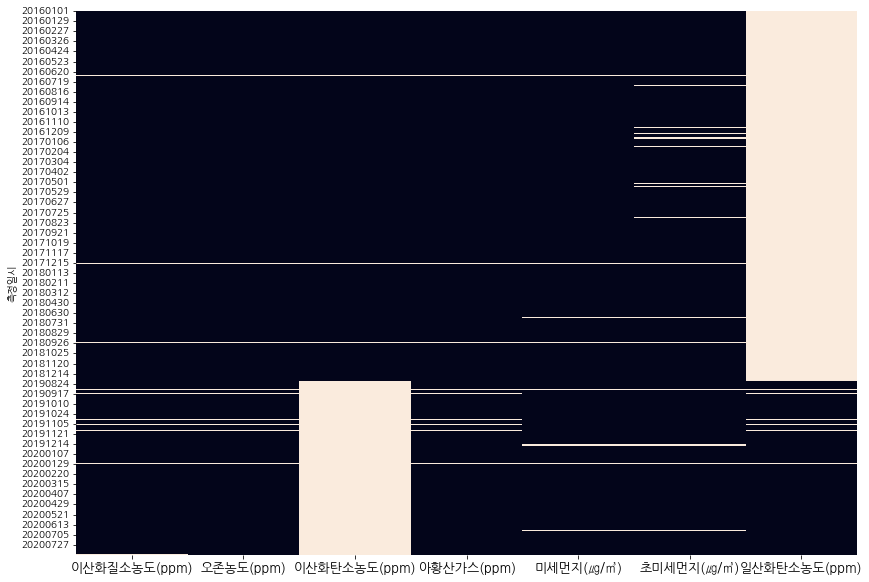

In [29]:
# 결측값 직관적으로 보기위한 시각화
# 이산화탄소농도 결측치가 많음
plt.figure(figsize=(14, 10))
ax = sns.heatmap(df1.loc[:, '이산화질소농도(ppm)':'일산화탄소농도(ppm)'].isna(), cbar=False)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=13, rotation=0)
plt.show()

In [30]:
# 필요 컬럼만 추출해서 새로운 데이터프레임으로 만들기
df_dust = df1[['측정소명', '년', '월', '일','오존농도(ppm)', '미세먼지(㎍/㎥)', '초미세먼지(㎍/㎥)']]
df_dust.head()

,측정소명,년,월,일,오존농도(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
측정일시,,,,,,,
20160101,강남구,2016,1,1,0.006,73.0,44.0
20160101,성북구,2016,1,1,0.005,71.0,45.0
20160101,송파구,2016,1,1,0.004,64.0,39.0
20160101,신촌로,2016,1,1,0.004,87.0,40.0
20160101,양천구,2016,1,1,0.008,82.0,65.0


In [31]:
df_dust.isnull().sum()

측정소명             0
년                0
월                0
일                0
오존농도(ppm)     2133
미세먼지(㎍/㎥)      881
초미세먼지(㎍/㎥)    1779
dtype: int64

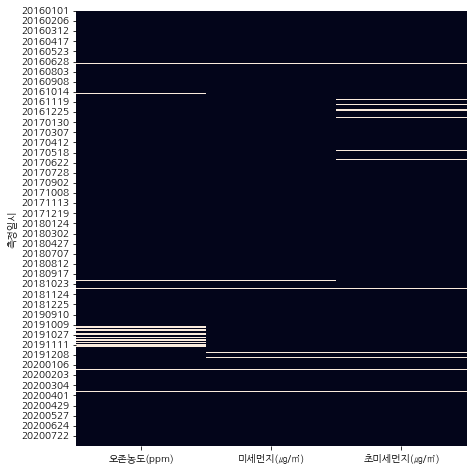

In [32]:
plt.figure(figsize=(7, 8))
sns.heatmap(df_dust.loc[:, '오존농도(ppm)':'초미세먼지(㎍/㎥)'].isna(), cbar=False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0,fontsize=12)
plt.show()

In [33]:
df_dust = df_dust.reset_index()
df_dust.head()

,측정일시,측정소명,년,월,일,오존농도(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,20160101,강남구,2016,1,1,0.006,73.0,44.0
1,20160101,성북구,2016,1,1,0.005,71.0,45.0
2,20160101,송파구,2016,1,1,0.004,64.0,39.0
3,20160101,신촌로,2016,1,1,0.004,87.0,40.0
4,20160101,양천구,2016,1,1,0.008,82.0,65.0


In [34]:
# 결측치 제거 how = all/any 차이점 확인
temp1 = df_dust.dropna(how='all', subset=['오존농도(ppm)','미세먼지(㎍/㎥)', '초미세먼지(㎍/㎥)'])
print(len(df_dust) - len(temp1))

592


In [35]:
temp2 = df_dust.dropna(how='any', subset=['오존농도(ppm)','미세먼지(㎍/㎥)', '초미세먼지(㎍/㎥)'])
print(len(df_dust) - len(temp2))

3359


In [36]:
temp3 = df_dust.dropna(thresh=2, subset=['오존농도(ppm)','미세먼지(㎍/㎥)', '초미세먼지(㎍/㎥)'])
print(len(df_dust) - len(temp3))

842


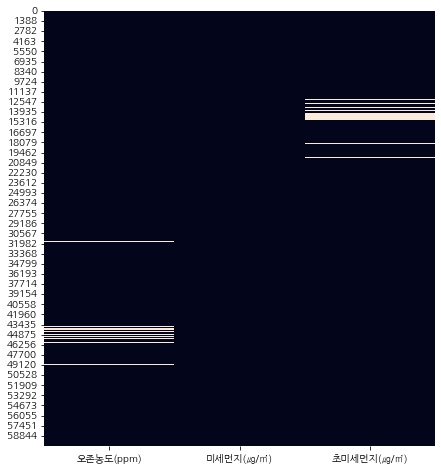

In [37]:
plt.figure(figsize=(7, 8))
sns.heatmap(temp3.loc[:, '오존농도(ppm)':'초미세먼지(㎍/㎥)'].isna(), cbar=False)
plt.show()

In [38]:
#groupby로 확인
meandf = df_dust.groupby(['년', '월'])[['미세먼지(㎍/㎥)']].mean()
meandf

미세먼지(㎍/㎥)
년    월            
2016 1   52.693844
     2   48.283273
     3   66.799503
     4   73.327039
     5   58.624172
     6   47.872304
     7   35.531092
     8   37.124378
     9   40.013841
     10  40.191363
     11  54.729965
     12  50.693522
2017 1   55.719138
     2   49.554029
     3   64.532392
     4   59.582549
     5   66.029826
     6   43.878112
     7   36.667496
     8   24.564570
     9   36.624786
     10  32.496689
     11  45.322222
     12  52.992327
2018 1   53.998324
     2   55.842459
     3   43.815303
     4   52.001222
     5   40.376068
     6   49.719231
     7   26.415215
     8   23.940299
     9   21.652651
     10  30.030576
     11  53.707242
     12  43.704176
2019 8   27.714286
     9   22.069071
     10  31.012975
     11  40.752425
     12  42.162968
2020 1   43.070856
     2   41.949630
     3   46.351002
     4   45.610667
     5   36.477082
     6   38.060298
     7   22.118754
     8   22.322222

In [39]:
# 결측치 제거 후 컬럼 추가
meandf['결측치제거후'] = temp2.groupby(['년','월'])['미세먼지(㎍/㎥)'].mean()
meandf['차이'] = meandf['미세먼지(㎍/㎥)'] - meandf['결측치제거후'] # 파생변수 만들기

In [40]:
meandf.loc[:(2017,6),:]

미세먼지(㎍/㎥)     결측치제거후        차이
년    월                                 
2016 1   52.693844  52.693844  0.000000
     2   48.283273  48.283273  0.000000
     3   66.799503  66.799503  0.000000
     4   73.327039  73.327039  0.000000
     5   58.624172  58.571784  0.052388
     6   47.872304  47.872304  0.000000
     7   35.531092  35.417235  0.113857
     8   37.124378  37.147870 -0.023492
     9   40.013841  40.051304 -0.037464
     10  40.191363  40.128497  0.062867
     11  54.729965  53.557128  1.172837
     12  50.693522  50.028426  0.665095
2017 1   55.719138  55.638219  0.080919
     2   49.554029  49.554029  0.000000
     3   64.532392  64.580699 -0.048307
     4   59.582549  57.955078  1.627471
     5   66.029826  64.139216  1.890610
     6   43.878112  43.922865 -0.044753

In [41]:
# 결측치 대체
import numpy as np
temp = pd.DataFrame({'A':[np.nan, 2, np.nan, 4],
                     'B':[7, 8, 9, 10],
                     'C':[1, 2, 4, 8]})

In [42]:
temp['A'].mask(temp['A'].isna(), temp['B'])

0    7.0
1    2.0
2    9.0
3    4.0
Name: A, dtype: float64

In [43]:
temp['A'].where(temp['A'].notna(),temp['C'])

0    1.0
1    2.0
2    4.0
3    4.0
Name: A, dtype: float64

In [44]:
df_dust.groupby('측정일시')['미세먼지(㎍/㎥)'].mean()

측정일시
20160101    70.736842
20160102    53.789474
20160103    98.861111
20160104    76.205128
20160105    34.333333
              ...    
20200814    31.660000
20200815    37.400000
20200816    22.380000
20200817    24.980000
20200818    27.080000
Name: 미세먼지(㎍/㎥), Length: 1403, dtype: float64

In [45]:
fine_dust = df_dust.groupby('측정일시')['미세먼지(㎍/㎥)'].transform('mean')

In [46]:
df_dust['미세먼지(㎍/㎥)'].isna().sum(),fine_dust.isna().sum()

(881, 0)

In [47]:
df_dust['미세먼지(㎍/㎥)'].mask(df_dust['미세먼지(㎍/㎥)'].isna(),fine_dust).isna().sum()

0

In [48]:
df_dust.isna().sum()

측정일시             0
측정소명             0
년                0
월                0
일                0
오존농도(ppm)     2133
미세먼지(㎍/㎥)      881
초미세먼지(㎍/㎥)    1779
dtype: int64

In [49]:
meandf['결측치대체'] = df_dust.groupby(['년','월'])['미세먼지(㎍/㎥)'].mean()
meandf['차이2'] = meandf['미세먼지(㎍/㎥)'] - meandf['결측치대체']

In [50]:
meandf.loc[:(2017,6)]

미세먼지(㎍/㎥)     결측치제거후        차이      결측치대체  차이2
년    월                                                 
2016 1   52.693844  52.693844  0.000000  52.693844  0.0
     2   48.283273  48.283273  0.000000  48.283273  0.0
     3   66.799503  66.799503  0.000000  66.799503  0.0
     4   73.327039  73.327039  0.000000  73.327039  0.0
     5   58.624172  58.571784  0.052388  58.624172  0.0
     6   47.872304  47.872304  0.000000  47.872304  0.0
     7   35.531092  35.417235  0.113857  35.531092  0.0
     8   37.124378  37.147870 -0.023492  37.124378  0.0
     9   40.013841  40.051304 -0.037464  40.013841  0.0
     10  40.191363  40.128497  0.062867  40.191363  0.0
     11  54.729965  53.557128  1.172837  54.729965  0.0
     12  50.693522  50.028426  0.665095  50.693522  0.0
2017 1   55.719138  55.638219  0.080919  55.719138  0.0
     2   49.554029  49.554029  0.000000  49.554029  0.0
     3   64.532392  64.580699 -0.048307  64.532392  0.0
     4   59.582549  57.955078  1.627471  59.582549  0.0
     5   66.029826  64.139216  1.890610  66.029826  0.0
     6   43.878112  43.922865 -0.044753  43.878112  0.0

In [51]:
meandf['차이'].sum(),meandf['차이2'].sum()

(4.492509007163061, 0.0)

In [52]:
meandf['차이'].abs().sum(), meandf['차이2'].abs().sum()

(7.062269281823493, 0.0)

In [53]:
for t in ['오존농도(ppm)', '초미세먼지(㎍/㎥)']:
    x = df_dust.groupby('측정일시')[t].transform('mean')
    s = df_dust[t]
    df_dust[t] = s.mask(s.isna(), x)

In [54]:
x = df_dust.groupby('측정일시')['오존농도(ppm)'].transform('mean')
s = df_dust['오존농도(ppm)']
df_dust['오존농도(ppm)'] = s.mask(s.isna(), x)

In [55]:
x = df_dust.groupby('측정일시')['초미세먼지(㎍/㎥)'].transform('mean')
s = df_dust['초미세먼지(㎍/㎥)']
df_dust['초미세먼지(㎍/㎥)']= s.mask(s.isna(), x)

In [56]:
x = df_dust.groupby('측정일시')[['오존농도(ppm)', '초미세먼지(㎍/㎥)']].transform('mean')
y = df_dust[['오존농도(ppm)', '초미세먼지(㎍/㎥)']]
df_dust[['오존농도(ppm)', '초미세먼지(㎍/㎥)']] = y.mask(y.isna(), x)

In [57]:
df_dust.isna().sum()

측정일시            0
측정소명            0
년               0
월               0
일               0
오존농도(ppm)       0
미세먼지(㎍/㎥)     881
초미세먼지(㎍/㎥)      0
dtype: int64

In [58]:
df_dust.to_csv('fine_dust02.csv', index=False)

In [59]:
df_dust2 = pd.read_csv('fine_dust02.csv')
df_dust2.isna().sum()

측정일시            0
측정소명            0
년               0
월               0
일               0
오존농도(ppm)       0
미세먼지(㎍/㎥)     881
초미세먼지(㎍/㎥)      0
dtype: int64

In [60]:
import shelve
with shelve.open('mydata') as data:
    data['fine_dust02'] = df_dust

#### 4. 미세먼지 분석

In [61]:
pd.options.display.float_format = '{:.2f}'.format
df_dust.head(2)

,측정일시,측정소명,년,월,일,오존농도(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,20160101,강남구,2016,1,1,0.01,73.00,44.00
1,20160101,성북구,2016,1,1,0.01,71.00,45.00


행, 열에 모두 group을 지정하여 통계값 구하기

- DataFrame.pivot_table(index=행방향그룹열이름, columns=열방향그룹열이름, values=집계대상열이름, aggfunc=구할 통계값)
- 각각에 대해 단독 또는 목록을 사용할 수 있음
- index, columns는 범주형, values는 연속형 사용
- values, aggfunc의 경우 단독의 경우 출력에 표시되지 않으나, 목록은 표시됨

In [62]:
df_dust.pivot_table(index='월',
             columns='년',
             values=['미세먼지(㎍/㎥)'],
             aggfunc=['mean','min','max'])

mean                               min                          \
   미세먼지(㎍/㎥)                         미세먼지(㎍/㎥)                           
년       2016  2017  2018  2019  2020      2016  2017  2018  2019  2020   
월                                                                        
1      52.69 55.72 54.00   NaN 43.07     22.00 14.00 15.00   NaN  3.00   
2      48.28 49.55 55.84   NaN 41.95      9.00 23.00 22.00   NaN  7.00   
3      66.80 64.53 43.82   NaN 46.35     18.00 19.00  6.00   NaN 18.00   
4      73.33 59.58 52.00   NaN 45.61     21.00 14.00  5.00   NaN 11.00   
5      58.62 66.03 40.38   NaN 36.48     14.00 15.00  4.00   NaN  5.00   
6      47.87 43.88 49.72   NaN 38.06     15.00 11.00 30.00   NaN  4.00   
7      35.53 36.67 26.42   NaN 22.12      3.00  8.00  3.00   NaN  3.00   
8      37.12 24.56 23.94 27.71 22.32      4.00  5.00  4.00 11.00  3.00   
9      40.01 36.62 21.65 22.07   NaN      7.00  6.00  4.00  3.00   NaN   
10     40.19 32.50 30.03 31.01   NaN      5.00  5.00  3.00  3.00   NaN   
11     54.73 45.32 53.71 40.75   NaN     12.00 12.00  4.00  3.00   NaN   
12     50.69 52.99 43.70 42.16   NaN     19.00 14.00 14.00 13.00   NaN   

         max                              
   미세먼지(㎍/㎥)                              
년       2016   2017   2018   2019   2020  
월                                         
1     127.00 151.00 154.00    NaN  90.00  
2     124.00 135.00 127.00    NaN 103.00  
3     166.00 149.00 141.00    NaN 142.00  
4     270.00 134.00 117.00    NaN 126.00  
5     153.00 243.00 105.00    NaN 167.00  
6     122.00  85.00  85.00    NaN  79.00  
7      85.00  85.00  73.00    NaN 167.00  
8     122.00  76.00  59.00 130.00  58.00  
9     104.00  94.00  83.00  77.00    NaN  
10    117.00  97.00  90.00 179.00    NaN  
11    139.00 108.00 199.00 297.00    NaN  
12    117.00 165.00 114.00 142.00    NaN

In [63]:
place = df[df_dust['측정소명']=='강남구']
place

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),이산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),일산화탄소농도(ppm),년,월,일
0,20160101,강남구,0.05,0.01,0.80,0.01,73.00,44.00,NaN,2016,1,1
66,20160102,은평구,0.04,0.02,0.60,0.01,45.00,24.00,NaN,2016,1,2
98,20160103,송파구,0.05,0.01,1.20,0.01,76.00,44.00,NaN,2016,1,3
143,20160104,정릉로,0.02,0.03,0.60,0.01,79.00,42.00,NaN,2016,1,4
174,20160105,성북구,0.02,0.02,0.40,0.01,29.00,15.00,NaN,2016,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
59983,20190822,서울숲,0.02,0.04,NaN,0.00,41.00,24.00,0.10,2019,8,22
60030,20190821,북한산,0.01,0.03,NaN,0.00,25.00,18.00,0.60,2019,8,21
60068,20190820,구로구,0.02,0.03,NaN,0.00,27.00,16.00,0.30,2019,8,20
60130,20190819,북한산,0.01,0.04,NaN,0.00,18.00,12.00,0.60,2019,8,19


In [64]:
place.pivot_table(index=['월'], columns=['년'], values=['미세먼지(㎍/㎥)'], aggfunc=['mean'])

mean                        
   미세먼지(㎍/㎥)                        
년       2016  2017  2018  2019  2020
월                                   
1      51.13 57.06 55.90   NaN 42.20
2      45.97 49.29 59.59   NaN 41.81
3      64.06 61.77 47.50   NaN 45.88
4      73.60 60.97 55.43   NaN 46.43
5      58.84 72.32 43.62   NaN 39.00
6      45.17 44.03 51.14   NaN 37.37
7      34.41 35.77 26.69   NaN 23.80
8      36.35 24.03 24.48 27.00 21.21
9      39.70 38.03 22.67 23.96   NaN
10     39.84 34.03 30.23 35.53   NaN
11     57.85 46.47 53.00 38.60   NaN
12     48.81 55.65 44.94 42.55   NaN

In [65]:
place.pivot_table(index=['년', '월'], values=['미세먼지(㎍/㎥)'], aggfunc=['mean'])

mean
        미세먼지(㎍/㎥)
년    월           
2016 1      51.13
     2      45.97
     3      64.06
     4      73.60
     5      58.84
     6      45.17
     7      34.41
     8      36.35
     9      39.70
     10     39.84
     11     57.85
     12     48.81
2017 1      57.06
     2      49.29
     3      61.77
     4      60.97
     5      72.32
     6      44.03
     7      35.77
     8      24.03
     9      38.03
     10     34.03
     11     46.47
     12     55.65
2018 1      55.90
     2      59.59
     3      47.50
     4      55.43
     5      43.62
     6      51.14
     7      26.69
     8      24.48
     9      22.67
     10     30.23
     11     53.00
     12     44.94
2019 8      27.00
     9      23.96
     10     35.53
     11     38.60
     12     42.55
2020 1      42.20
     2      41.81
     3      45.88
     4      46.43
     5      39.00
     6      37.37
     7      23.80
     8      21.21

#### 
- Series.argmax() : 가장 값이 큰 것의 integer index 구하기
- Series.argmin() : 가장 값이 작은 것의 integer index 구하기
- Series[Series.argmax()] : 가장 큰 값 구하기
- Series[Series.argmin()] : 가장 작은 값 구하기

In [66]:
# argmin, argmax 연습
s = pd.Series([1, 0, 5, 7, 9, 2, 6, 8],
              index=list('ABCDEFGH'))
s

A    1
B    0
C    5
D    7
E    9
F    2
G    6
H    8
dtype: int64

In [67]:
a = s.argmin()
b = s.argmax()
print(a,s[a])
print(b,s[b])

1 0
4 9


In [68]:
display(s['A'],s[['A','D']]),s[s>5]

1

A    1
D    7
dtype: int64

(None,
 D    7
 E    9
 G    6
 H    8
 dtype: int64)

In [69]:
display(s[0],s[[0,3]],s[2:5])

1

A    1
D    7
dtype: int64

C    5
D    7
E    9
dtype: int64

In [70]:
# 2016~2020 미세먼지 농도가 가장 높은 월은?
temp = df_dust.pivot_table(index=['월'],
                    columns=['년'],
                    values='미세먼지(㎍/㎥)',
                    aggfunc='mean')
temp

년,2016,2017,2018,2019,2020
월,,,,,
1,52.69,55.72,54.00,NaN,43.07
2,48.28,49.55,55.84,NaN,41.95
3,66.80,64.53,43.82,NaN,46.35
4,73.33,59.58,52.00,NaN,45.61
5,58.62,66.03,40.38,NaN,36.48
6,47.87,43.88,49.72,NaN,38.06
7,35.53,36.67,26.42,NaN,22.12
8,37.12,24.56,23.94,27.71,22.32
9,40.01,36.62,21.65,22.07,NaN


In [73]:
for year in [2016,2017,2018,2019,2020] :
    idx = temp[year].argmax()
    print(f'{year} 미세먼지 농도 높은 월 : {temp.index[idx]}월')

2016 미세먼지 농도 높은 월 : 4월
2017 미세먼지 농도 높은 월 : 5월
2018 미세먼지 농도 높은 월 : 2월
2019 미세먼지 농도 높은 월 : 12월
2020 미세먼지 농도 높은 월 : 3월


In [75]:
temp = df_dust.loc[df_dust['년']<=2019,:].groupby('월')[['미세먼지(㎍/㎥)']].mean()
temp

,미세먼지(㎍/㎥)
월,
1,54.14
2,51.14
3,60.44
4,62.70
5,56.77
6,46.26
7,33.07
8,28.41
9,29.97


In [79]:
temp['미세먼지 2020'] = df_dust.loc[df_dust['년']==2020, :].groupby('월')[['미세먼지(㎍/㎥)']].mean()
temp

,미세먼지(㎍/㎥),미세먼지 2020
월,,
1,54.14,43.07
2,51.14,41.95
3,60.44,46.35
4,62.70,45.61
5,56.77,36.48
6,46.26,38.06
7,33.07,22.12
8,28.41,22.32
9,29.97,NaN


In [81]:
temp['차이'] = temp['미세먼지(㎍/㎥)'] - temp['미세먼지 2020']
temp

,미세먼지(㎍/㎥),미세먼지 2020,차이
월,,,
1,54.14,43.07,11.07
2,51.14,41.95,9.19
3,60.44,46.35,14.09
4,62.70,45.61,17.08
5,56.77,36.48,20.29
6,46.26,38.06,8.20
7,33.07,22.12,10.95
8,28.41,22.32,6.09
9,29.97,NaN,NaN
